In [1]:
from model.head import features
from model.rpn import RPN
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

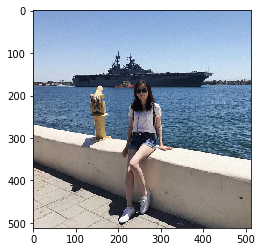

In [2]:
img1=io.imread('./Notebook/size_1.jpg')
img2=io.imread('./Notebook/size_2.jpg')
# img3=io.imread('./Notebook/size_3.jpg')

plt.imshow(img2)

In [3]:
import torch
import torchvision.transforms as T
print(img1.shape)
trsfm=T.ToTensor()

x=torch.from_numpy(np.array([img1,img2]))
x=x.permute(0,3,1,2)
print(x.shape)
# x=trsfm(img).unsqueeze(0)
# plt.imshow(img)

(512, 512, 3)
torch.Size([2, 3, 512, 512])


In [4]:
dtype=torch.float
USE_GPU=True

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

device=torch.device('cuda')
print(device)

cuda


In [5]:
x=x.to(dtype=dtype,device=device)
features.cuda(device=device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (16): ReLU(inplace)
  (17): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [6]:
featureMap=features(x)

In [7]:
featureMap.shape

torch.Size([2, 512, 32, 32])

In [8]:
import torch.nn as nn
output=[]
t=featureMap[0]
g=nn.AdaptiveMaxPool2d((7,7))
m=g(t[:,1:25,2:10])
output.append(m)

t=featureMap[1]
g=nn.AdaptiveMaxPool2d((7,7))
m=g(t[:,5:25,1:10])
output.append(m)

e=torch.stack(output, dim=0)
print(e.shape)

torch.Size([2, 512, 7, 7])


In [17]:
from model.head import classifer

classifer

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [9]:
rNet=RPN()

In [10]:
rNet.cuda()
# rNet.train()

RPN(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (score): Conv2d(512, 18, kernel_size=(1, 1), stride=(1, 1))
  (loc): Conv2d(512, 36, kernel_size=(1, 1), stride=(1, 1))
)

In [11]:
img_size=img1.shape
print(img_size)
score, loc, rois,roi_indices, anchor=rNet(featureMap,img_size)

(512, 512, 3)


In [12]:
# rois = rois*(1.0/16.0)

# rois=rois.astype(np.int32)
    
print(rois.shape)
print(roi_indices.shape)

m=np.where(roi_indices==0)[0]
print(m.shape)

(2000, 4)
(2000,)
(1000,)


In [13]:
from model.utils.roi_pooling import RoIPool
roiPool=RoIPool()
output=roiPool(featureMap,rois, roi_indices)

In [14]:
print(output.shape)

torch.Size([2000, 512, 7, 7])


(2000, 4)


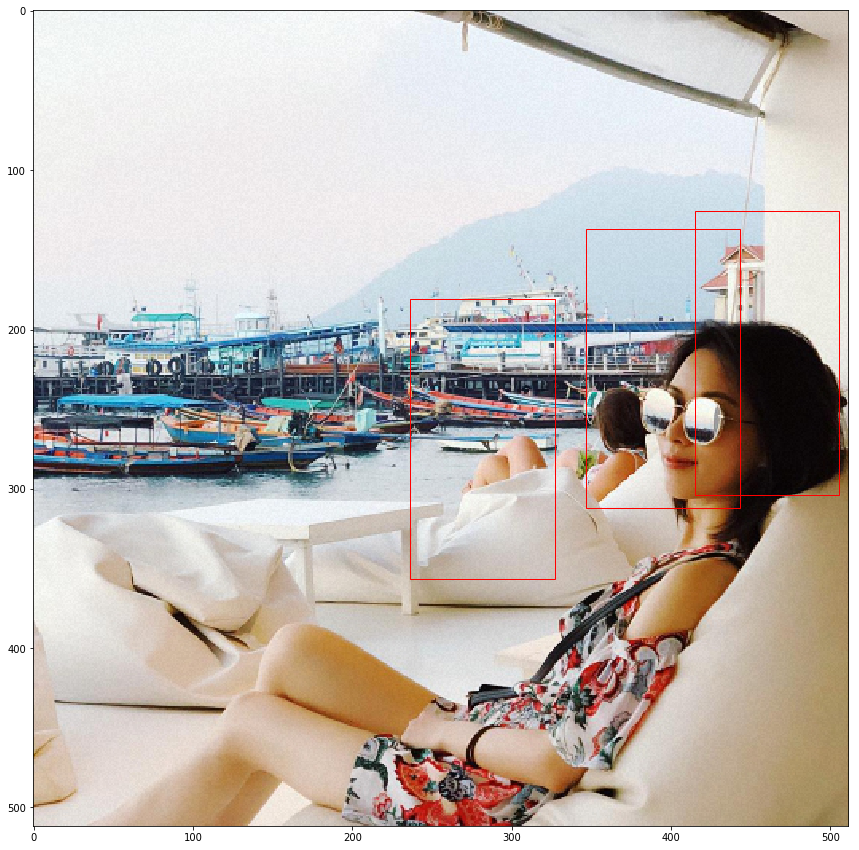

In [15]:
import matplotlib.patches as patches

fig,ax = plt.subplots(1,figsize=(15,15))


# Display the image
ax.imshow(img1)

# rois=anchor
print(rois.shape)
n=100
for i in range(n,n+3):
    xy=rois[i][0:2]
    w=rois[i][2]-rois[i][0]
    h=rois[i][3]-rois[i][1]
    # Create a Rectangle patch
    rect = patches.Rectangle(xy,w,h,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()




In [16]:
max(rois[0][1][:])

IndexError: invalid index to scalar variable.